In [96]:
!pip install scikit-learn

In [147]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sys
import glob
import importlib

In [150]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [151]:
df_price=pd.read_excel('./data/가격데이터_증감비교_라벨링.xlsx')

In [183]:
df_news_list=[]
for i in range(208):
    globals()['df_news_{}'.format(i)]=pd.read_excel('./WordCount/word_count_{}.xlsx'.format(i))
    df_news_list.append(globals()['df_news_{}'.format(i)])

In [184]:
# df_news_list=[]
# for i in range(208):
#     globals()['df_news_{}'.format(i)]=pd.read_csv('./stem/stem_list{}.txt'.format(i),encoding = "utf-8")
#     df_news_list.append(globals()['df_news_{}'.format(i)])

In [259]:
df_price

,도축일,경락단가,경락단가_평균,label
1,2018-01-14,3743.336317,3743.336317,1
2,2018-01-21,3743.359986,3743.359986,1
3,2018-01-28,3835.679915,3835.679915,1
4,2018-02-04,4276.198330,4276.198330,1
5,2018-02-11,4724.707319,4724.707319,1
6,2018-02-18,4103.632481,4103.632481,2
7,2018-02-25,3794.280663,3794.280663,2
8,2018-03-04,4094.180790,4094.180790,1
9,2018-03-11,3868.237571,3868.237571,2
10,2018-03-18,3909.816732,3909.816732,1


In [186]:
df_price=df_price.drop(0)

KeyError: '[0] not found in axis'

In [222]:
news_list=[]
for i in range(208):
    news_list.append(list(df_news_list[i]['Word']))

In [224]:
df_news_list[0]

,Unnamed: 0,Word,Count
0,79,두,53
1,76,돼지,36
2,73,돈,26
3,56,농가,26
4,265,한,26
5,247,출하,22
6,2,MSY,20
7,226,종돈,20
8,191,이,17
9,255,평균,17


In [226]:
data= pd.DataFrame({'news': news_list})
# data= pd.DataFrame(news_list)

In [247]:
data['news']=data['news'].astype(str)

In [248]:
type(data['news'].iloc[0])

str

In [249]:
X_data = data['news']
y_data = df_price['label']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 208
레이블의 개수: 208


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [251]:
X_train

0      ['두', '돼지', '돈', '농가', '한', '출하', 'MSY', '종돈',...
1      ['돈', '지난해', '돼지', '가격', '한', '하다', '최근', '두수'...
2      ['돼지', '출하', '수입', '등', '경우', '최근', '일', '되다',...
3      ['돈', '한', '전', '육', '돼지', '지난해', '양돈', '농가', ...
4      ['증가', '돼지', '생산', '돈', '가격', '하다', '및', '최근',...
5      ['구제역', '발생', '돈', '육', '백신', '하다', '지난해', '이상...
6                                                  [nan]
7      ['농가', '성적', '목표', '자급', '률', '돈', '경우', '산', ...
8      ['돈', '양돈', '종돈', '국내', '모돈', '한', '생산', '등', ...
9      ['돼지', '가격', '대비', '것', '들', '로', '출하', '돈', '...
10     ['돈', '지난해', '한', '수입', '대비', '전', '들', '법화', ...
11     ['미국', '수입', '수출', '돼지', '육', '고용', '돈육', '률',...
12     ['국내', '외국인', '하다', '돼지', '노동자', '한', '돈', '등'...
13     ['돼지', '수입', '미국', '시장', '돈', '농가', '한', '하다',...
14     ['수입', '돼지', '돼지고기', '올해', '최근', '돈', '농가', '량...
15     ['한', '가격', '하다', '사료', '수입', '미국', 'FTA', '돈'...
16     ['돼지', '수입', '돼지고기', '육', '두수', '값', '사', '증가'...
17                             

In [252]:
print('훈련 샘플의 개수 :', len(X_train))
print('테스트 샘플의 개수 :', len(X_test))

훈련 샘플의 개수 : 166
테스트 샘플의 개수 : 42


In [253]:
print('--------훈련 데이터의 비율-----------')
print(f'유지 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'상승 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'하락 = {round(y_train.value_counts()[2]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
유지 = 32.53%
상승 = 37.349%
하락 = 30.12%


In [254]:
print('--------테스트 데이터의 비율-----------')
print(f'유지 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'상승 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print(f'하락 = {round(y_test.value_counts()[2]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
유지 = 19.048%
상승 = 50.0%
하락 = 30.952%


In [255]:
X_train.iloc[0]

"['두', '돼지', '돈', '농가', '한', '출하', 'MSY', '종돈', '이', '평균', '하락', '지난해', '수입', '증가', '사육', '환경', '물량', '두수', '장', '축산', '값', '최근', '연속', '전', '지난', '신규', '상반기', '사상', '들', '미만', '한돈팜스', '질병', '이후', '업체', '최고', '년', '양돈', '시', '작년', '육', '생산', '되다', '것', '농장', '기준', '내내', '식', '역시', '입', '일반', '화', '하다', '별로', '계열', '개선', '수가', '가격', '사', '사용', '대비', '약세', '또한', '수', '농', '경영', '종개', '변화', '별', '무허가', '장관', '모돈', '위해', '분석', '로', '지속', '비율', '악화', '그동안', '가축', '가운데', '가수', '통해', '기록', '이상', '비육', '달', '조사', '협', '주체', '법화', '이유', '이중', '예방', '개량', '호조', '관리', '시작', '노력', '가량', '기간', '적', '재화', '성적', '김', '전산', '크게', '암', '때', '강화', '이경수', '유지', '시설', '상', '새해', '영향', '연간', '적극', '세', '세다', '세로', '안전', '신년사', '식품', '연', 'AI', '전체', '축사', '대규모', '부처', '다만', '늘다', '통관', '농림축산식품부', '나선', '김영록', '표시', '국내', '국가', '관계', '곳', '허가', '현재', '경연', '협회', '후', 'kg', '대해', '원년', '직수입', '못', '많다', '마리', '중', '량', '보다', '또', '미국', '전환', '돼지고기', '동물복지', '모두', '종축', '전망', '해오다', '주요', '자료', '제도', '협의', '확

In [256]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])

[[58, 4, 8, 19, 13, 39, 669, 536, 10, 55, 61, 20, 51, 17, 153, 232, 59, 43, 63, 171, 79, 11, 272, 6, 14, 857, 373, 301, 9, 337, 727, 194, 21, 224, 181, 24, 3, 62, 242, 32, 115, 7, 5, 68, 48, 1203, 195, 129, 471, 582, 130, 1, 134, 858, 338, 243, 44, 85, 319, 16, 182, 40, 18, 163, 350, 1632, 287, 185, 1995, 537, 172, 47, 41, 72, 104, 472, 670, 339, 158, 60, 1204, 26, 56, 52, 387, 117, 135, 1375, 1996, 1376, 255, 1205, 198, 473, 948, 64, 173, 174, 86, 112, 94, 949, 474, 950, 1997, 89, 2686, 146, 136, 1998, 175, 217, 218, 779, 116, 859, 273, 147, 1206, 475, 728, 1999, 288, 233, 621, 137, 538, 780, 781, 302, 320, 2000, 73, 1377, 2687, 1207, 53, 176, 539, 501, 951, 105, 303, 49, 225, 351, 83, 2688, 1633, 234, 90, 274, 74, 70, 289, 76, 186, 374, 57, 1058, 154, 540, 65, 860, 159, 622, 671, 352, 502, 1208, 583, 375, 1209, 2689, 1634, 46, 952, 256, 476, 106, 321, 729, 376, 2001, 15, 503, 623, 541, 2002, 121, 2690, 2, 1210, 477, 80, 2003, 2691, 1059, 1378, 118, 584, 124, 353, 1211, 340, 322, 405,

In [257]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size)

4822


본문의 최대 길이 : 3421
본문의 평균 길이 : 1196.3855421686746


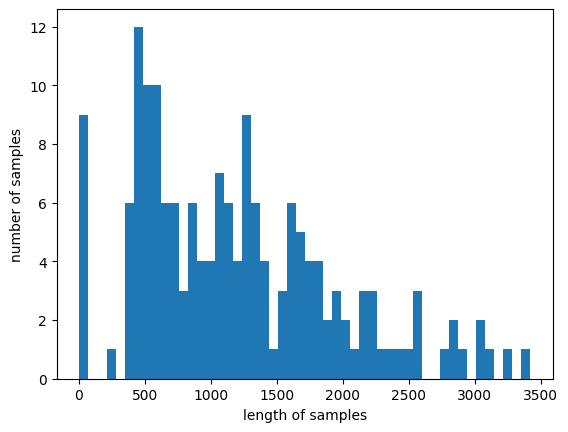

In [258]:
print('본문의 최대 길이 :',max(len(sent) for sent in X_train))
print('본문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(sent) for sent in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 3421

In [ ]:
X_train_encoded = pad_sequences(X_train_encoded, maxlen=max_len)
X_test_encoded = pad_sequences(X_test_encoded, maxlen=max_len)

In [ ]:
X_train_encoded.shape

In [ ]:
X_test_encoded.shape

## 모델링

In [236]:
X_train_encoded=[]
    
vect=CountVectorizer()
for i in range(len(X_train)):
    vect.fit_transform(X_train)
    X_train_encoded.append(vect.vocabulary_)




AttributeError: 'list' object has no attribute 'lower'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])

In [207]:
sample_list=['A','B','C']
sample_lower=[]
for i in range(len(sample_list)):
    sample_lower.append(sample_list[i].lower())
print(sample_lower)

['a', 'b', 'c']


In [ ]:
# 형태소 분석을 위한 함수

def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

In [ ]:
def data_preprocessing():
    
    # 학습셋, 테스트셋 분리
    news_list2 = news_list
    price_list = df_price['label'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    # 데이터의 80%는 학습셋, 20%는 테스트셋
    news_train, news_test, price_train, price_test = train_test_split(news_list2, price_list, test_size=0.2, random_state=0)
    
    return news_train, news_test, price_train, price_test

In [ ]:
def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    
    tfidf = TfidfVectorizer(lowercase=False)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    
    # 학습
    pipe.fit(x_train, y_train)
    
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    
    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
        
    print('저장완료')     # 학습된 모델 저장 완료

In [ ]:
def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat','rb') as fp:     # 읽기
        pipe = pickle.load(fp)
        
    while True :
        text = input('뉴스 키워드를 입력해주세요 : ')     # 인풋
        
        str = [text]
        
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str)*100)     # 확률값을 구해서 *100..?
        
        # 예측 결과
        r2 = pipe.predict(str)[0]     # 긍정('1'), 부정('0')
        
        if r2 == '1':
            print('돼지고기 가격은 상승할 것으로 예상됩니다.')
        
        elif r2 == '0':
            print('돼지고기 가격은 유지될 것으로 예상됩니다.')
        else: 
            print('돼지고기 가격은 하락할 것으로 예상됩니다.')
            
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')

In [ ]:
# 학습 함수

def model_learning():   # 감성분석 모델 생성
    news_train, news_test, price_train, price_test = data_preprocessing()
    learning(news_train, price_train, news_test, price_test)
    
# 사용 함수

def model_using():   # 감성분석 모델 사용
    using()

In [ ]:
model_learning()